# Fast Kalman Filter for Temporal-spatial Data Analysis

In [261]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from CO2simulation import CO2simulation
import matplotlib.pyplot as plt
import numpy as np
import visualizeCO2 as vco2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Tracking a CO$_2$ Plume

CO$_2$ from an industrial site can be compressed and injected into a deep saline aquifer for storage. This technology is called __CO$_2$ capture and storage__ or __CCS__, proposed in (TODO) to combat global warming. As CO$_2$ is lighter than the saline water, it may leak through a natural fracture and contanimate the drinking water. Therefore, monitoring and predicting the long term fate of CO$_2$ at the deep aquifer level is crucial as it will provide an early warning for the CO$_2$ leakage. The goal is to __interprete the time-series data recorded in the seismic sensors into spatial maps of a moving CO$_2$ plume__, a problem very similar to CT scanning widely used in medical imaging.

The goal is
* Predict and monitor the location of CO$_2$ plume
*  

## Simulating the Movement of CO$_2$ Plume

Here is a simulated CO$_2$ plume for $5$ days resulted from injecting $300$ tons of CO$_2$ at a depth of $1657m$.

$$ x_{k+1} = f(x_k) + w $$


run code that displays the simulated moving CO$_2$ plume, stored the plume data in SQL?? (TODO)

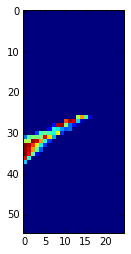

In [99]:
CO2 = CO2simulation('low')
data = []
x = []
for i in range(10):
  data.append(CO2.move_and_sense())
  x.append(CO2.x)

param = vco2.getImgParam('low')
vco2.plotCO2map(x,param)
plt.show()

## Simulating the Sensor Measurement


The sensor measures the travel time of a seismic signal from a source to a receiver.

$$ y = Hx + v $$

$x$ is the grid block value of CO$_2$ slowness, an idicator of how much CO$_2$ in a block. The product $Hx$ simulate the travel time measurements by integrating $x$ along a raypath. $v$ is the measurement noise.

The presence of CO$_2$ slows down the seismic signal and increases its travel time along a ray path. If the ray path does not intercepts the CO$_2$ plume, the travel time remains constant over time (Ray path 1), otherwise it tends to increase once the CO$_2$ plume intercepts the ray path (Ray path 2).

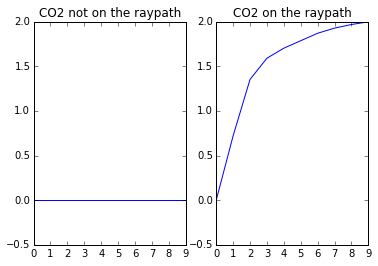

In [78]:
reload(visualizeCO2)
vco2.plotCO2data(data,0,47)

TODO:

- Fig: Run animation/image of the ray path (shooting from one source and receiver) on top of a CO$_2$ plume and display the travel time changes over time.
- Fig: Show the time-series data (Path 1 and Path 2) at a receiver with and without noise.

- optional: run getraypath will give me all the index of the cells and the length of the ray path within each cell, this can help me compute the travel time along this particular ray path

## Kalman filtering

### Initialization step
Define $x$, $P$. Before injection took place, there was no CO$_2$ in the aquifer.

In [288]:
np.dot(1,5)

5

(3245,)
(3245,)
(3245,)
(3245,)


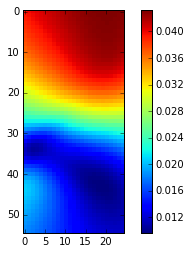

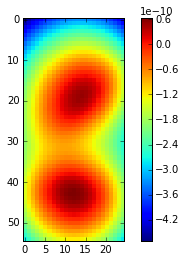

In [329]:
run runCO2simulation

> /Users/yueli/Dropbox/GitRepo/pyFKF/HiKF.py(159)predict()
-> self._var = self._var + self._sigma.reshape(self._var.shape)
(Pdb) self._sigma.shape
(3245, 1)
(Pdb) c
(3245, 1)
(3245, 1)


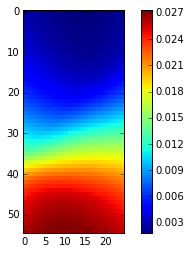

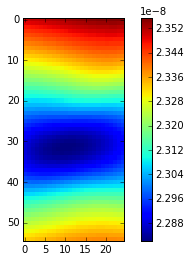

In [326]:
run runCO2simulation

### Implementing the Prediction Step

$$ x_{k+1} = x_{k} + w_k $$

Note here a simplified __Random Walk__ forecast model is used to substitute $f(x)$. The advantage of using a random walk forecast model is that now we are dealing with a linear instead of nonlinear filtering problem, and the computational cost is much lower as we don't need to evaluate $f(x)$. However, when $dt$ is very large, this random walk forecast model will give poor predictions, and the prediction error cannot be well approximated by $w_k\approx N(0,Q)$, a zero mean Gaussian __process noise__ term. Therefore, the random walk forecast model is only useful when the measuremetns are sampled at a high frequency, and $Q$ has to be seclected to reflect the true model error. 

In [97]:
from filterpy.common import Q_discrete_white_noise
kf.F = np.diag(np.ones(dim_x))
# kf.Q = Q_discrete_white_noise(dim = dim_x, dt = 0.1, var = 2.35)
kf.Q = 2.5
kf.predict()
print kf.x[:10]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Implementing the Update Step

In [94]:
kf.H = CO2.H_mtx
kf.R *= 0.5
z = data[0]
kf.update(z)

TODO
- Fig: Estimate at k, Forecast at k+1, Estimate at k+1, True at k+1
- A table showing:
    x: the time CO2 reaches the monitoring well
    y: the time CO2 reaches the ray path
    PREDICT:    x       var      y       UPDATE: x       var       y
- Fig: MSE vs time
- Fig: Data fitting, slope 45 degree indicates a perfect fit


Use HiKF instead of KF

In [296]:
from HiKF import HiKF
hikf = HiKF(dim_x, dim_z)
hikf.x

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

## Filter design
### Scalability
KF has a quadratic cost ($\mathcal{O}(N^2)$), which means for a typical problem size of $10^6$ the Kalman filter will take $80$ days to solve. 



TODO
- Table: running time and computational storage cost comparison between KF and HiKF

### Choose $Q$ that represents the model error



### By choosing an appropriate $Q/R$ ratio to optimize the filter preformance 